In [25]:
### 필요 라이브러리 ###
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import os
import cv2
import pickle
import mnist #이미지불러오기 가능
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten
from tensorflow.keras.models import Sequential # 순차적으로 쌓겠다
from tensorflow.keras.utils import to_categorical
import json
from tensorflow.keras.models import model_from_json

In [2]:
### 실제이미지를 for문으로 특정폴더 이미지를 list에다가 하나씩 저장한다.

### 데이터 불러오기

In [3]:
TRAIN_DIR = 'Car_Brand_Logos/Train'
TEST_DIR = 'Car_Brand_Logos/Test'

train_folder_list = os.listdir(TRAIN_DIR)
test_folder_list = os.listdir(TEST_DIR)

In [4]:
train_folder_list

['hyundai',
 'lexus',
 'mazda',
 'mercedes',
 'opel',
 'skoda',
 'toyota',
 'volkswagen']

In [5]:
IMG_SIZE = 48
train_images=[]
train_labels=[]

for index in range(0,len(train_folder_list)):
    path = os.path.join(TRAIN_DIR,train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path,img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except:
            pass

In [6]:
IMG_SIZE = 48
test_images=[]
test_labels=[]

for index in range(0,len(test_folder_list)):
    path = os.path.join(TEST_DIR,test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path,img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            test_images.append(new_img)
            test_labels.append(index)
        except:
            pass

In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [8]:
print(train_images.shape)  #48, 48 픽셀(해상도)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(2513, 48, 48)
(2513,)
(400, 48, 48)
(400,)


In [9]:
eachImg = pd.DataFrame( train_images[89] )

In [10]:
eachImg.to_csv("F:/eachImg.csv") # 해당 csv파일에서 특징들을 추출

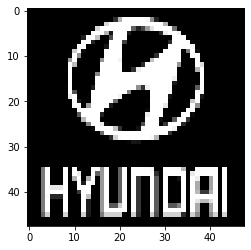

In [11]:
plt.imshow(eachImg,cmap="gray")

In [12]:
# 이미지 정규화(255로 나눠주면 0~1사이의 값으로 나눈다)

In [13]:
train_images = (train_images/255)
test_images = (test_images/255)

In [14]:
#train_images = train_images.reshape((len(train_images),48,48))

In [15]:
print(train_images.shape)

(2513, 48, 48)


In [16]:
## 각각의 값을 하나의 숫자로 나누고 싶을때는 array로 형변환해서 나눠준다(np.array)

In [17]:
# np.array([1,2,3,4]) / 2
# 답: array([0.5, 1. , 1.5, 2. ])
# [1,2,3,4])/2 답 = 오류

In [18]:
# onehot형식으로 변환을 해서 softmax 함수에 맵핑하려함(softmax는 주어진 카테고리의 확률이 1이되도록 %로 나오됌)

In [19]:
train_labels_one_hot = to_categorical( train_labels ) 
test_labels_one_hot = to_categorical( test_labels ) 

In [20]:
# 원상태로 복귀

In [21]:
np.argmax( train_labels[4] )

0

### B-1. 모델 생성

In [4]:
# input layer를 위한 설정
input_shape = train_images[0].shape

NameError: name 'train_images' is not defined

In [5]:
# output layer를 위한 설정(유니크한 값만 가져와줘 => 카테고리의 값 및 개수)
nClasses = len( np.unique(train_labels) )
model = Sequential()


NameError: name 'np' is not defined

In [6]:
model = Sequential()
# input layer
model.add(Flatten(input_shape= input_shape))
# hidden layer
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=16, activation="relu"))
# output layer
model.add(Dense(units=nClasses, activation="softmax"))

NameError: name 'Sequential' is not defined

In [7]:
model.summary()

NameError: name 'model' is not defined

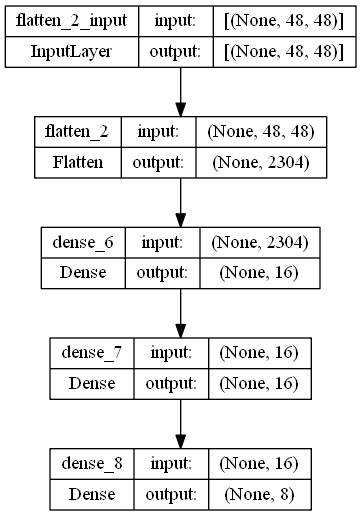

In [116]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)

### B-2. 모델 컴파일

In [117]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### B-3. 모델 훈련

In [118]:
# int(2513*0.8)/32 = 62.81개 훈련하고 업뎃하고 62.81개 훈련하고 업뎃하고 이걸 32번 반복한다.
# 32개씩 데이터(전체-검증데이터)를 10번 반복하여 학습함.

In [122]:
history = model.fit(x=train_images,
                    y=train_labels_one_hot,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
63/63 [==============================] - 0s 3ms/step - loss: 1.8670 - accuracy: 0.2114 - val_loss: 5.1780 - val_accuracy: 0.0000e+00
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 1.8413 - accuracy: 0.2219 - val_loss: 5.2034 - val_accuracy: 0.0000e+00
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 1.8142 - accuracy: 0.2403 - val_loss: 5.9936 - val_accuracy: 0.0000e+00
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 1.7910 - accuracy: 0.2423 - val_loss: 7.2467 - val_accuracy: 0.0000e+00
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 1.7714 - accuracy: 0.2498 - val_loss: 6.2480 - val_accuracy: 0.0000e+00
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 1.7585 - accuracy: 0.2617 - val_loss: 5.0803 - val_accuracy: 0.0000e+00
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 1.7430 - accuracy: 0.2746 - val_loss: 7.4994 - val_accuracy: 0.0

### C-1. 모델 추론

In [120]:
# testdata 모든건에 대해서 예측을 해보고 옆에 정확도를 써준다

In [121]:
model.evaluate(test_images, test_labels_one_hot)

13/13 [==============================] - 0s 2ms/step - loss: 2.8341 - accuracy: 0.2050


[2.8340773582458496, 0.20499999821186066]

In [81]:
# 피클에 저장

In [82]:
with open('carBrand.pkl', 'wb') as f:
    pickle.dump(model, f)

In [83]:
with open('carBrand.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [84]:
print(loaded_dict)

### C-2. 모델 예측

In [85]:
pwd

'C:\\Users\\SMART27\\stdcode6\\Session_All_practice'

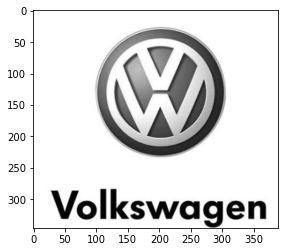

In [86]:
# 이미지 불러오기/저장
IMG_SIZE = 48
sample_images=[]
img_path = "./volks2.png"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")

In [87]:
refinedImg = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

In [88]:
sample_images.append(new_img)
sample_images

[array([[203, 211, 219, ..., 226, 225, 224],
        [204, 212, 218, ..., 225, 225, 225],
        [204, 213, 219, ..., 226, 225, 225],
        ...,
        [204, 212, 219, ..., 226, 225, 225],
        [204, 211, 218, ..., 225, 225, 225],
        [203, 211, 217, ..., 225, 226, 225]], dtype=uint8)]

In [89]:
sample_images = np.array(sample_images)
sample_images = (sample_images/255)
sample_images

array([[[0.79607843, 0.82745098, 0.85882353, ..., 0.88627451,
         0.88235294, 0.87843137],
        [0.8       , 0.83137255, 0.85490196, ..., 0.88235294,
         0.88235294, 0.88235294],
        [0.8       , 0.83529412, 0.85882353, ..., 0.88627451,
         0.88235294, 0.88235294],
        ...,
        [0.8       , 0.83137255, 0.85882353, ..., 0.88627451,
         0.88235294, 0.88235294],
        [0.8       , 0.82745098, 0.85490196, ..., 0.88235294,
         0.88235294, 0.88235294],
        [0.79607843, 0.82745098, 0.85098039, ..., 0.88235294,
         0.88627451, 0.88235294]]])

In [90]:
predictValue = np.argmax(model.predict(sample_images))
predictValue

1/1 [==============================] - 0s 55ms/step


5